**Heart Disease Dataset**

Importing Libraries

In [1]:
'''importing packages required'''

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

Data Loading

In [2]:
# Load dataset
df = pd.read_csv("heart.csv")

In [3]:
# View first 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Data Cleaning

In [4]:
# Check shape
df.shape

(1025, 14)

In [5]:
# Check missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# Check duplicates
df.duplicated().sum()

np.int64(723)

In [7]:
# Remove duplicates if any
df = df.drop_duplicates()

Exploratory Data Analysis (EDA)

In [8]:
# Basic statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# Target distribution
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

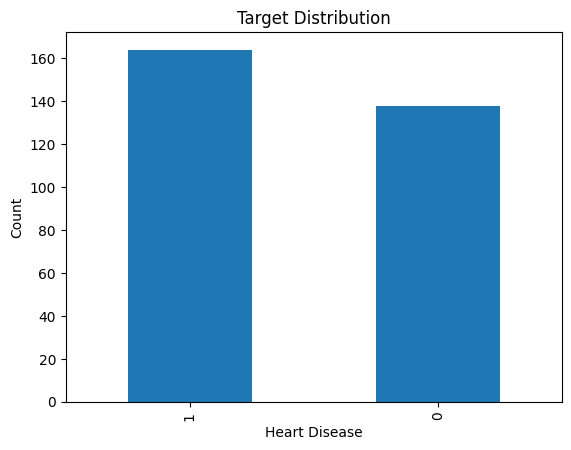

In [10]:
# Plot target distribution
df['target'].value_counts().plot(kind='bar')
plt.title("Target Distribution")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()

Preprocessing

In [11]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

*Split Dataset into Train and Test Sets*

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

##Purpose of Training vs Testing

- Training data: Used to teach the model patterns
- Testing data: Used to evaluate performance on unseen data

->Prevents overfitting and ensures real-world reliability

*Train a Simple Model (Logistic Regression)*

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


*Predict on Test Data*

In [15]:
y_pred = model.predict(X_test)

*Calculate Accuracy, Precision, Recall*

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7704918032786885
Precision: 0.7027027027027027
Recall: 0.896551724137931


*Confusion Matrix*

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[21, 11],
       [ 3, 26]])

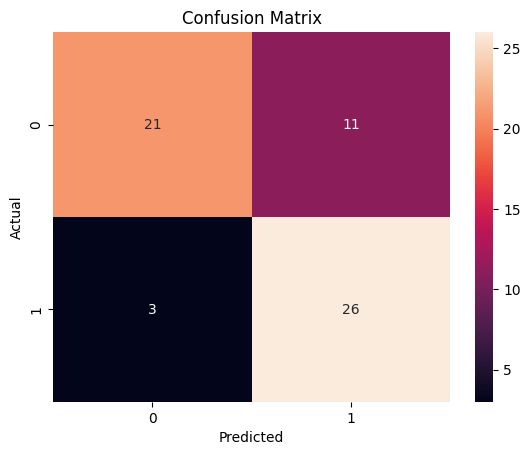

In [18]:
#visualization
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Interpret Results

- Accuracy: Overall correctness of the model
- Precision: When the model predicts heart disease, how often it is correct
- Recall: How many actual heart disease cases the model successfully detected

->Confusion Matrix Explanation:

- True Positives: Correct disease prediction
- True Negatives: Correct no-disease prediction
- False Positives: Wrong disease prediction
- False Negatives: Missed disease cases (most critical in healthcare)

->Conclusion:
Logistic Regression provides a simple, interpretable baseline model suitable for binary classification like heart disease prediction.

DELIVERABLE 1: Trained Model

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'class_weight': [None, 'balanced']
}

# GridSearch with F1-score optimization
grid = GridSearchCV(
    LogisticRegression(max_iter=500),
    param_grid,
    scoring='f1',
    cv=5
)

# Train model
grid.fit(X_train, y_train)

# Best trained model
best_model = grid.best_estimator_

print("Best Parameters:", grid.best_params_)
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)

Best Parameters: {'C': 0.01, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}


In [26]:
# Model Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Predictions
y_pred = best_model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Detailed report
print(classification_report(y_test, y_pred))


Accuracy: 0.8032786885245902
Precision: 0.7297297297297297
Recall: 0.9310344827586207
              precision    recall  f1-score   support

           0       0.92      0.69      0.79        32
           1       0.73      0.93      0.82        29

    accuracy                           0.80        61
   macro avg       0.82      0.81      0.80        61
weighted avg       0.83      0.80      0.80        61



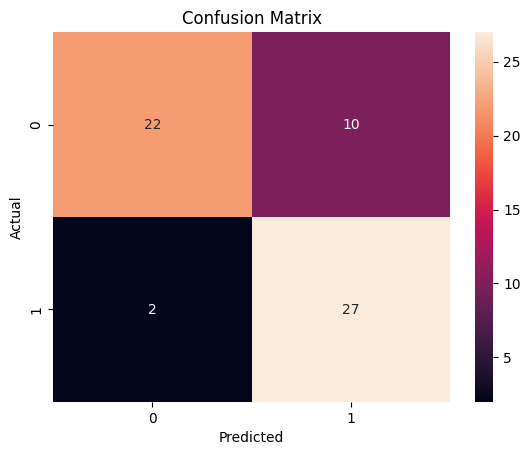

In [27]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [28]:
import joblib

# Save trained model
joblib.dump(best_model, "logistic_regression_model.pkl")

['logistic_regression_model.pkl']